In [ ]:
!pip install easyocr
!pip install imutils

#!pip uninstall opencv-python-headless 
#!pip install opencv-python-headless==4.1.2.30

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr
from google.colab.patches import cv2_imshow
import pickle

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow import keras
model = keras.models.load_model("/content/drive/MyDrive/Ogunleye Project/CODES/Models/CNNmodel", compile=False)


In [ ]:
"""
import cv2
  
img = edged
print(type(img))
  
# Shape of the image
#print("Shape of the image", img.shape)
  
# [rows, columns]
crop1 = img[400:470, 750:1000]  #This works for 5 front, 10 front, 20 front, 50 back
crop2 = img[100:250, 770:1050]  #This works for 100 front, 200 front, 500 front
crop3= img[0:150, 0:300]  #This works only for 1000 back
from google.colab.patches import cv2_imshow
#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
print(6)
plt.imshow(cv2.cvtColor(crop2, cv2.COLOR_BGR2RGB))
dede= cv2.cvtColor(crop2, cv2.COLOR_BGR2RGB)
"""


'\nimport cv2\n  \nimg = edged\nprint(type(img))\n  \n# Shape of the image\n#print("Shape of the image", img.shape)\n  \n# [rows, columns]\ncrop1 = img[400:470, 750:1000]  #This works for 5 front, 10 front, 20 front, 50 back\ncrop2 = img[100:250, 770:1050]  #This works for 100 front, 200 front, 500 front\ncrop3= img[0:150, 0:300]  #This works only for 1000 back\nfrom google.colab.patches import cv2_imshow\n#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))\nprint(6)\nplt.imshow(cv2.cvtColor(crop2, cv2.COLOR_BGR2RGB))\ndede= cv2.cvtColor(crop2, cv2.COLOR_BGR2RGB)\n'

In [ ]:
def make_prediction(path):
  img= cv2.imread(path, 1)
  img= cv2.resize(img, dsize=(128, 128), interpolation= cv2.INTER_LINEAR)
  img= img/255
  shape= (1, 128, 128, 3)
  arr= np.zeros(shape)
  arr[0]= img
  pred= model.predict(arr)
  prediction= pred.argmax(axis=1)[0]

  return prediction

In [ ]:
path= "/content/drive/MyDrive/Ogunleye Project/DATASET/Nigerian Currency dataset/ADEKCURR-DB/5 naira/5-front-5.jpg"
make_prediction(path)

0

In [ ]:
def get_crop(path):
  img= cv2.imread(path, 1)
  img= cv2.resize(img, dsize=(1100, 550), interpolation= cv2.INTER_LINEAR)
  A= [0,1,2,3]
  B= [4,5,6] 
  C= [7]
  crop= 0

  if make_prediction(path) == 0: 
    crop= img[400:450, 770:1150]
  if make_prediction(path) == 1: 
    crop= img[400:470, 770:1150]
  if make_prediction(path) == 2: 
    crop= img[400:470, 770:1150]
  if make_prediction(path) == 3: 
    crop= img[400:470, 770:1150]
  if make_prediction(path) == 4: 
    crop= img[100:190, 760:1020]
  if make_prediction(path) == 5: 
    crop= img[100:190, 750:1000]
  if make_prediction(path) == 6: 
    crop= img[100:190, 720:1000]
  if make_prediction(path) == 7: 
    crop= img[30:120, 50:290]

  return crop

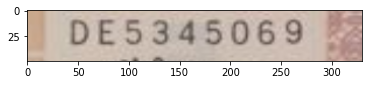

In [ ]:
img= cv2.cvtColor(get_crop(path), cv2.COLOR_BGR2RGB)
plt.imshow(img)

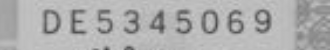

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)
#plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)) #OpenCV uses BGR image format, we convert to RGB so plt can give a similar output

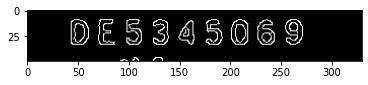

In [ ]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
#cv2_imshow(edged)
edged_complete= cv2.cvtColor(edged, cv2.COLOR_BGR2RGB)
plt.imshow(edged_complete)

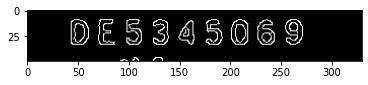

In [ ]:
#plt.imshow(cv2.cvtColor(cv2.imread(path, 1), cv2.COLOR_BGR2RGB))
#plt.imshow(img)
#plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
#plt.imshow(cv2.cvtColor(bfilter, cv2.COLOR_BGR2RGB))
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

### Serial Number Extraction

In [ ]:
reader= easyocr.Reader(["en"])
result= reader.readtext(edged)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[36, 38], [62, 38], [62, 62], [36, 62]], 'M', 0.9998629140154804),
 ([[25, 32], [224, 32], [224, 95], [25, 95]], '3245902', 0.8656511837463247)]

In [ ]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

In [ ]:
bottom_right

(233, 55)

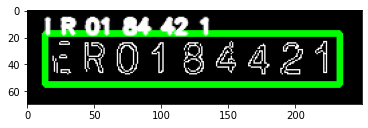

In [ ]:
annotated_image = cv2.rectangle(edged_complete, top_left,bottom_right,(0,255,0),3)
annotated_image = cv2.putText(annotated_image, text,top_left, font, 0.5,(255,255,255),2,cv2.LINE_AA)
plt.imshow(annotated_image)

In [ ]:
print(text)

I R 01 84 42 1


In [ ]:
real_text=""
for i in text:
  if(i == " "): continue
  real_text+= i
print(real_text)

IR0184421


In [ ]:
for image, prediction in zip(images, predictions):
    keras_ocr.tools.drawAnnotations(image=image, predictions=prediction, ax=axs)

In [ ]:
X= pickle.load(open("/content/drive/MyDrive/Ogunleye Project/CODES/X.pkl", "rb"))
y= pickle.load(open("/content/drive/MyDrive/Ogunleye Project/CODES/y.pkl", "rb"))

In [ ]:
print(X.shape, y.shape)

(271, 550, 1100, 3) (271,)


In [ ]:
a= pickle.load(open("/content/drive/MyDrive/Ogunleye Project/CODES/IMAGES.pkl", "rb"))

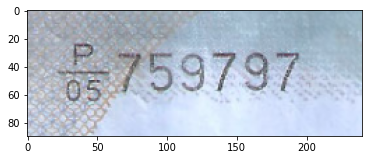

In [ ]:
dd= 256
plt.imshow(a[dd][30:120, 50:290])

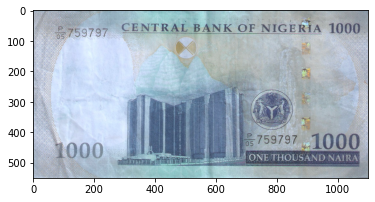

In [ ]:
plt.imshow(a[dd])

In [ ]:
print("toyin")

toyin


In [ ]:
!pip install jellyfish
import jellyfish

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
a= "disturb"
b= "danndfg"
jellyfish.levenshtein_distance(a, b)
#jellyfish.jaro_distance(a,b)

6

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score

In [ ]:
print(accuracy_score(a, b))

In [ ]:
!sudo apt install tesseract-ocr
!apt-get install tess
!apt-get install tesseract-ocr-eng

!pip install -U git+https://github.com/madmaze/pytesseract.git
from PIL import Image
import pytesseract

In [ ]:
path= "/content/drive/MyDrive/Ogunleye Project/DATASET/Nigerian Currency dataset/ADEKCURR-DB/5 naira/5-front-12.jpg"
g= pytesseract.image_to_string(path)
print(g)